In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd 
from torch.utils.data import DataLoader ,Dataset
import numpy as np 
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.optim as optim
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA





In [2]:
T2D_f = pd.read_csv("../Data/Microbiome_data/T2D_data/T2D_fuctional.csv",sep=",")
T2D_tax = pd.read_csv("../Data/Microbiome_data/T2D_data/T2D_taxo.csv",sep=",")
T2D_gen = pd.read_csv("../Data/Microbiome_data/T2D_data/T2D_gen40.csv",sep=",")
T2D_labels = pd.read_csv("../Data/Microbiome_data/T2D_data/T2D_ylab.txt")
T2D_labels= T2D_labels.iloc[:-1]
T2D_labels = T2D_labels[:].values
T2D_labels= pd.DataFrame(T2D_labels)
T2D_labels = T2D_labels.replace({"Control": 1, "T2D": 0})

CRC_f = pd.read_csv("../Data/Microbiome_data/CRC_data/CRC_Fuctional.csv",sep=",")
CRC_tax = pd.read_csv("../Data/Microbiome_data/CRC_data/CRC_Taxo.csv",sep=",")
CRC_gen = pd.read_csv("../Data/Microbiome_data/CRC_data/CRC_gen40.csv",sep=",")
CRC_labels = pd.read_csv("../Data/Microbiome_data/CRC_data/CRC_ylab.txt")
CRC_labels= CRC_labels.iloc[:-1]
CRC_labels = CRC_labels[:].values
CRC_labels= pd.DataFrame(CRC_labels)
CRC_labels = CRC_labels.replace({"control": 1, "CRC": 2})

IBD_f = pd.read_csv("../Data/Microbiome_data/IBD_data/IBD_fuctional.csv",sep=",")
IBD_tax = pd.read_csv("../Data/Microbiome_data/IBD_data/IBD_taxo.csv",sep=",")
IBD_gen = pd.read_csv("../Data/Microbiome_data/IBD_data/IBD_gen40.csv",sep=",")
IBD_labels = pd.read_csv("../Data/Microbiome_data/IBD_data/IBD_ylab.txt")
IBD_labels= IBD_labels.iloc[:-1]
IBD_labels = IBD_labels[:].values
IBD_labels= pd.DataFrame(IBD_labels)
IBD_labels = IBD_labels.replace({"Normal": 1, "IBD": 3})


LC_f = pd.read_csv("../Data/Microbiome_data/LC_data/LC_Fuctional.csv",sep=",")
LC_tax = pd.read_csv("../Data/Microbiome_data/LC_data/LC_taxo.csv",sep=",")
LC_gen = pd.read_csv("../Data/Microbiome_data/LC_data/LC_gen40.csv",sep=",")
LC_labels = pd.read_csv("../Data/Microbiome_data/LC_data/LC_ylab.txt")
LC_labels= LC_labels.iloc[:-1]
LC_labels = LC_labels[:].values
LC_labels= pd.DataFrame(LC_labels)
LC_labels = LC_labels.replace({"Normal": 1, "Cirrhosis": 4})


In [3]:
f1 = torch.tensor(T2D_f.values)
f2 = torch.tensor(T2D_gen.values)
f3 = torch.tensor(T2D_tax.values)
f4 = torch.tensor(IBD_f.values)
f5 = torch.tensor(IBD_gen.values)
f6 = torch.tensor(IBD_tax.values)
f7= torch.tensor(CRC_f.values)
f8 = torch.tensor(CRC_gen.values)
f9= torch.tensor(CRC_tax.values)
f10 = torch.tensor(LC_f.values)
f11= torch.tensor(LC_gen.values)
f12 = torch.tensor(LC_tax.values)

l1 = torch.tensor(T2D_labels.values)
l2 = torch.tensor(IBD_labels.values)
l3 = torch.tensor(CRC_labels.values)
l4 = torch.tensor(LC_labels.values)


In [4]:
T2D_comb = torch.cat((f1,f2,f3), dim=1)
IBD_comb = torch.cat((f4,f5,f6), dim=1)
CRC_comb = torch.cat((f7,f8,f9), dim=1)
LC_comb = torch.cat((f10,f11,f12), dim=1)
compined = torch.cat((T2D_comb,IBD_comb,CRC_comb,LC_comb))

labels_combined = torch.cat((l1,l2,l3,l4))

Test1 = torch.cat((f2,f5,f8,f11))
TestL= torch.cat((l1,l2,l3,l4))

In [5]:
#Save it to tensor .pt objects
torch.save(TestL, '../Data/Tensors_objs/labels.pt')
torch.save(Test1, '../Data/Tensors_objs/features.pt')
np.savetxt("test",Test1,delimiter =",")
np.savetxt("TestL",TestL,delimiter=",")
np.savetxt("Data", compined, delimiter=",")
np.savetxt("Labels", labels_combined, delimiter=",")


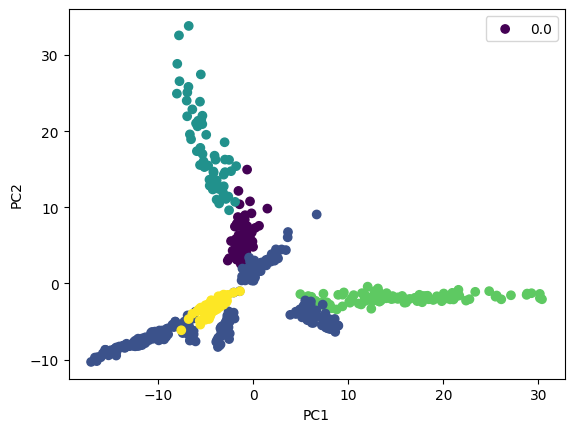

In [8]:


# Load your data into a numpy array called X
X = np.loadtxt("test", delimiter=",")
y = np.loadtxt("Labels")

# Separate your class labels from your feature data


# Apply PCA to reduce the dimensionality of your data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot your data in 2 dimensions, colored by class label
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.legend(y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [9]:
# Load the microbiome data and labels into PyTorch tensors
data = torch.load("../Data/Tensors_objs/features.pt")
labels = torch.load("../Data/Tensors_objs/labels.pt")
data = torch.DoubleTensor(data)
labels = labels.float()
labels = labels.double()
#labels = torch.DoubleTensor(labels)
nan_indices = torch.isnan(data)
data = torch.where(nan_indices, torch.tensor(0.0), data)


dataset = torch.utils.data.TensorDataset(data, labels)
# Define the dataset and dataloader
dataloader = DataLoader(dataset, batch_size=128)

In [10]:
# Define the dataset class
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {'data': self.data[idx], 'labels': self.labels[idx]}
        return sample

# Define the encoder
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, latent_size)
        self.fc3 = nn.Linear(hidden_size, latent_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        mu = self.fc2(x)
        logvar = self.fc3(x)
        return mu, logvar

# Define the decoder
class Decoder(nn.Module):
    def __init__(self, latent_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, latent_size)
        self.decoder = Decoder(latent_size, hidden_size, input_size)
        
    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decoder(z)
        return x_hat, mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

# Define the loss function
def loss_function(x_hat, x, mu, logvar):
    BCE = F.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Set the hyperparameters
batch_size = 128
input_size = 50
hidden_size = 32
latent_size = 8
learning_rate = 1e-4
num_epochs = 10

In [11]:
data = torch.log(data + 1)  # apply log transformation to data
dataset = MyDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=batch_size,shuffle=True)


In [12]:
# Define the model, optimizer, and scheduler
model = VAE(input_size, hidden_size, latent_size)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)


In [13]:
# Train the model
def train(model, dataloader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, batch in enumerate(dataloader):
        x = batch['data'].float()
        optimizer.zero_grad()
        x_hat, mu, logvar = model(x)
        loss = loss_function(x_hat, x, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(x), len(dataloader.dataset),
                100. * batch_idx / len(dataloader),
                loss.item() / len(x)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(
        epoch, train_loss / len(dataloader.dataset)))



In [14]:
# Train the model for several epochs
for epoch in range(1000):
    train(model, dataloader, optimizer, epoch)
    scheduler.step()

Epoch: 0 [0/636 (0%)]	Loss: 35.153629
====> Epoch: 0 Average loss: 35.1591
Epoch: 1 [0/636 (0%)]	Loss: 35.046780
====> Epoch: 1 Average loss: 35.2012
Epoch: 2 [0/636 (0%)]	Loss: 35.355740
====> Epoch: 2 Average loss: 35.1096
Epoch: 3 [0/636 (0%)]	Loss: 35.242977
====> Epoch: 3 Average loss: 35.1094
Epoch: 4 [0/636 (0%)]	Loss: 34.943111
====> Epoch: 4 Average loss: 35.0219
Epoch: 5 [0/636 (0%)]	Loss: 35.152977
====> Epoch: 5 Average loss: 35.0388
Epoch: 6 [0/636 (0%)]	Loss: 35.046810
====> Epoch: 6 Average loss: 35.0501
Epoch: 7 [0/636 (0%)]	Loss: 35.324902
====> Epoch: 7 Average loss: 35.0999
Epoch: 8 [0/636 (0%)]	Loss: 35.159672
====> Epoch: 8 Average loss: 35.0875
Epoch: 9 [0/636 (0%)]	Loss: 35.102524
====> Epoch: 9 Average loss: 35.0981
Epoch: 10 [0/636 (0%)]	Loss: 35.298141
====> Epoch: 10 Average loss: 35.1064
Epoch: 11 [0/636 (0%)]	Loss: 35.049404
====> Epoch: 11 Average loss: 35.0933
Epoch: 12 [0/636 (0%)]	Loss: 35.164124
====> Epoch: 12 Average loss: 35.1040
Epoch: 13 [0/636 (0

In [28]:
torch.save(VAE.state_dict(model), '../Model/vae_one_study2.pth')

In [52]:
#load Model and encode data
a = VAE.load_state_dict(model, torch.load('vae_one_study2.pth'))


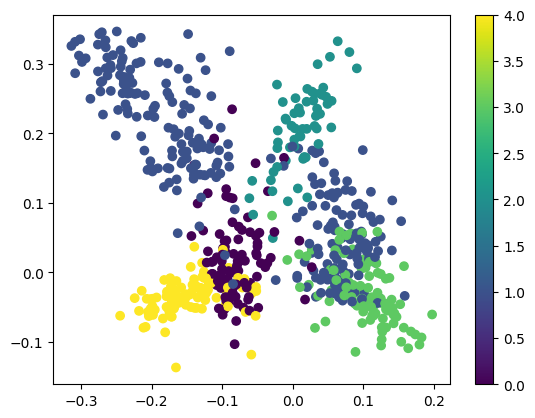

In [30]:
# Encode the data into the latent space
model.eval()
with torch.no_grad():
    encoded_data, labels = [], []
    for batch in dataloader:
        x = batch['data'].float()
        mu, _ = model.encoder(x)
        encoded_data.append(mu)
        labels.append(batch['labels'])
    encoded_data = torch.cat(encoded_data, dim=0)
    labels = torch.cat(labels, dim=0)

# Plot the latent space
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=labels)
plt.colorbar()
plt.show()

In [191]:

 

def find_nearest_neighbors(x, y, z, k=1):
    """
    Finds the k nearest neighbors to x in other classes.

    Args:
        x (torch.Tensor): A tensor representing the point from class 1.
        y (torch.Tensor): A tensor of data from all other classes.
        z (torch.Tensor): The full latent space.
        k (int): Number of neighbors to return.

    Returns:
        torch.Tensor: A tensor of k nearest neighbors to x in z.
    """
    # Initialize empty tensor for nearest neighbors
    nearest_neighbors = torch.Tensor([])
    i=1
    # Loop through each class
    for i in range(4):
            # Select data from class i
            class_data = y[i]
            print(class_data)

            # Calculate distances between x and class_data
            distances = torch.dist(x, class_data)
            print(distances)

            # Find the k nearest neighbors in class i
            _, indices = torch.topk(distances, k=k)
            print(indices)

            # Get the nearest neighbors in the full latent space
            class_z = z[y == i]
            nearest_z = class_z[indices]

            # Concatenate nearest neighbors to tensor
            nearest_neighbors = torch.cat((nearest_neighbors, nearest_z), dim=0)

    return nearest_neighbors

def draw_line(x, nearest_neighbors, latent_space):
    """
    Draws a line between x and its nearest neighbors in other classes.

    Args:
        x (torch.Tensor): A tensor representing the point from class 1.
        nearest_neighbors (torch.Tensor): A tensor of nearest neighbors from other classes.
        latent_space (torch.Tensor): The full latent space with shape (N, d).
    """
    # Plot x and nearest neighbors
    plt.plot(latent_space[:, 0], latent_space[:, 1], 'k,')
    plt.plot(x[0], x[1], 'ro')
    plt.plot(nearest_neighbors[:, 0], nearest_neighbors[:, 1], 'bo')

    # Draw line between x and nearest neighbors
    for neighbor in nearest_neighbors:
        plt.plot([x[0], neighbor[0]], [x[1], neighbor[1]], 'k--')

    # Compute distances between x and each point in the latent space
    distances = torch.norm(latent_space - x, dim=1)
    nearest_neighbor_distances = torch.norm(nearest_neighbors - x, dim=1)

    # Print the distances between x and the nearest neighbors
    print('Distances between x and nearest neighbors:')
    for i, distance in enumerate(nearest_neighbor_distances):
        print(f'Neighbor {i}: {distance:.3f}')

    # Print the distances between x and all other points in the latent space
    print('\nDistances between x and all other points in the latent space:')
    for i, distance in enumerate(distances):
        if i not in nearest_neighbors_indices:
            print(f'Point {i}: {distance:.3f}')

    # Set plot limits and show plot
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()









In [174]:
# Load  latent space and label datasets

with torch.no_grad():
    z, _ = model.encoder(data.float())
latent_space = z

# Find the indices of the data points in your latent space where the labels are 1
random_healthy = np.where(labels == 1)[0]


# Use the `random.choice()` function from NumPy to choose a random index from the indices of the data points where the labels are 1
random_Healthy = np.random.choice(random_healthy)

# Use the chosen index to get the corresponding data point from your latent space
random_H = latent_space[random_Healthy]



In [175]:
# Define the target classes
target_classes = [0,2,3,4]

# Initialize an empty list to store the tensors
tensors = []

# Loop through the target classes and find a random tensor from each class
for label in target_classes:
    # Get the indices of the data points in the target class
    indices = np.where(labels == label)[0]
    
    # Choose a random index from the indices
    random_index = np.random.choice(indices)
    
    # Get the corresponding tensor from the latent space
    tensor = torch.tensor(latent_space[random_index])
    
    # Add the tensor to the list
    tensors.append(tensor)

# Convert the list of tensors to a tuple
random_D = tensors

/var/folders/wt/pl8gm0gs50d6vpk0nxfh07_h0000gn/T/ipykernel_15163/4035618398.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(latent_space[random_index])


In [192]:
# Generate a random point from class 1
x = random_H  # Healthy
# Find nearest neighbors in other classes
y = random_D
nearest_neighbors = find_nearest_neighbors(x, y,z, k =1 )

# Draw line between point in class 1 and nearest neighbors in other classes
#draw_line(x, nearest_neighbors , z )

tensor([ 0.0496, -0.0104,  0.1613, -0.0780,  0.1446,  0.1894, -0.6111,  0.1203])
tensor(0.2039)
tensor(0)


IndexError: index 0 is out of bounds for dimension 0 with size 0

In [152]:

y[2]

tensor([ 0.0750,  0.1186,  0.0311, -0.3096,  0.0075,  0.1834, -0.4973,  0.0811])

In [58]:
with torch.no_grad():
    z, _ = model.encoder(data.float())

In [60]:
z

tensor([[-0.0946, -0.0154, -0.0465,  ...,  0.2684, -0.4903, -0.2521],
        [-0.0853,  0.0722, -0.1139,  ...,  0.3616, -0.4888, -0.2618],
        [-0.0358,  0.0134, -0.1270,  ...,  0.4359, -0.7532, -0.3426],
        ...,
        [-0.1735, -0.0082, -0.1815,  ...,  0.1555, -0.3987, -0.1153],
        [-0.1759, -0.0527, -0.1593,  ...,  0.2292, -0.5465, -0.1690],
        [-0.0580, -0.0298, -0.0264,  ...,  0.0413, -0.2951, -0.1693]])

In [68]:
# Import dataset and classes needed in this example:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from itertools import product

# Import Gaussian Naive Bayes classifier:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [69]:
# Split dataset into random train and test subsets:
train, test, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=5)

# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
classifier = gnb.fit(train, train_labels)
# Make predictions with the classifier:
predictive_labels = gnb.predict(test)
print(predictive_labels)

# Evaluate label (subsets) accuracy:
print(accuracy_score(test_labels, predictive_labels))

[4 1 0 2 1 0 1 4 4 1 1 2 0 4 0 3 1 3 1 1 1 1 3 1 3 3 4 0 4 1 0 3 4 2 1 1 1
 1 2 1 3 1 3 4 2 1 3 1 2 2 3 0 3 3 0 1 1 0 4 1 1 1 1 1 3 1 1 0 1 4 3 1 1 1
 1 1 1 2 4 1 0 1 4 4 4 4 2 1 1 1 1 0 3 1 4 1 1 4 4 1 1 0 3 4 4 1 1 4 0 1 1
 1 2 1 4 1 0 3 4 3 4 3 0 4 3 2 1 4]
1.0


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
# Split dataset into random train and test subsets:
train, test, train_labels, test_labels = train_test_split(compined, labels, test_size=0.2, random_state=11)

# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
classifier = gnb.fit(train, train_labels)
# Make predictions with the classifier:
predictive_labels = gnb.predict(test)
print(predictive_labels)

# Evaluate label (subsets) accuracy:
print(accuracy_score(test_labels, predictive_labels))

[1 1 3 4 3 4 4 3 4 0 1 1 1 1 4 1 1 0 0 0 2 4 1 1 4 1 1 1 1 1 1 1 1 2 4 1 4
 1 3 0 1 1 0 0 4 0 3 3 1 2 1 3 1 1 1 4 1 1 0 1 0 1 1 0 1 1 0 1 0 4 0 4 1 2
 4 1 1 3 1 1 4 1 1 1 1 4 3 4 1 3 4 3 0 2 3 4 2 3 2 1 1 1 1 2 0 1 1 4 1 1 1
 1 3 3 1 1 4 0 1 3 1 1 1 1 2 1 1 1]
0.9921875


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(compined, labels)
# Evaluate the classifier on the validation set
y_val_pred = clf.predict(test)
val_accuracy = accuracy_score(test_labels, y_val_pred)
val_confusion_matrix = confusion_matrix(test_labels, y_val_pred)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Validation confusion matrix:\n{val_confusion_matrix}")

Validation accuracy: 1.0000
Validation confusion matrix:
[[17  0  0  0  0]
 [ 0 66  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0 21]]


In [73]:
# Plot the decision boundaries and data points
x_min, x_max = test.min() - 0.1, test.max() + 0.1
y_min, y_max = test.min() - 0.1, test.max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))


In [74]:

# first, find the indices of the points in class A and class B
indices_A = np.where(labels == 1)[0]
indices_B = np.where(labels == 0)[0]

In [75]:
indices_A

array([ 42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 344, 345, 346, 347, 348, 352, 353, 354, 355, 357,
       358, 359, 360, 361, 362, 363, 364, 365, 366, 368, 369, 370, 371,
       372, 373, 374, 376, 377, 378, 379, 381, 382, 383, 384, 38

In [76]:
# extract the data points (Tensors) in class A and class B
points_A = data[indices_A]
points_B = data[indices_B]

In [77]:
#  closest point in class B to the first point in class A
point_A = points_A[0]
distances = torch.norm(points_B - point_A, dim=1)
min_distance = torch.min(distances)
closest_point_B = points_B[torch.argmin(distances)]

In [78]:
# calculate the difference between the two points
difference = closest_point_B - point_A

print(f"The minimum Euclidean distance between a point in class A and a point in class B is {min_distance}.")
print(f"The closest point in class B to the first point in class A is {closest_point_B}.")
print(f"The difference between the two points is {difference}.")

The minimum Euclidean distance between a point in class A and a point in class B is 24.572020023521226.
The closest point in class B to the first point in class A is tensor([0.0000, 0.0000, 0.1819, 0.0000, 0.0000, 0.0000, 0.0000, 0.2239, 0.2333,
        0.1362, 0.1235, 0.0000, 0.0000, 0.0000, 0.1215, 0.1320, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.1500, 0.0000, 0.0119, 0.0000, 0.0000, 0.0726,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2151, 0.0000, 0.0000, 0.1345,
        0.0000, 0.1855, 0.0000, 0.1912, 0.0000, 0.0000, 0.2760, 0.0000, 0.0666,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.2519, 0.0000, 0.0000, 1.2691,
        0.0000, 0.0000, 0.0000, 2.5403, 0.0000, 1.4951, 1.4841, 1.2158, 3.4579,
        0.0000, 0.2574, 1.5570, 0.0000, 3.4918, 1.1940, 0.0000, 0.0000, 0.1771,
        0.0000, 0.0000, 1.9311, 1.8469, 4.2595, 2.4102, 1.9308, 0.0000, 1.5183,
        4.4092, 0.0000, 0.4729, 0.0000, 0.2926, 2.7506, 0.0000, 0.0000, 2.1808,
        6.7957, 3.5056, 2.4417, 0.

In [42]:

indices = torch.where(torch.all(data == closest_point_B, axis=1))[0]


In [43]:
data[99]

tensor([0.0000, 1.9539, 1.0659, 0.0775, 0.0000, 0.4768, 0.0000, 0.0270, 0.0000,
        1.5593, 3.4844, 1.9633, 0.3306, 0.0000, 0.0000, 0.0000, 1.8488, 0.0000,
        1.3271, 0.0000, 0.0000, 0.0000, 0.0000, 1.9618, 0.0000, 3.0954, 1.7719,
        0.0000, 2.6623, 1.8815, 0.0000, 0.0000, 0.1827, 0.0000, 0.0000, 0.0000,
        0.0000, 0.3736, 0.5692, 2.3507, 0.0347, 0.0000, 3.6566, 1.9310, 0.0000,
        0.0000, 2.7296, 2.5002, 0.0000, 1.0050, 2.2519, 0.0000, 0.0000, 1.2691,
        0.0000, 0.0000, 0.0000, 2.5403, 0.0000, 1.4951, 1.4841, 1.2158, 3.4579,
        0.0000, 0.2574, 1.5570, 0.0000, 3.4918, 1.1940, 0.0000, 0.0000, 0.1771,
        0.0000, 0.0000, 1.9311, 1.8469, 4.2595, 2.4102, 1.9308, 0.0000, 1.5183,
        4.4092, 0.0000, 0.4729, 0.0000, 0.2926, 2.7506, 0.0000, 0.0000, 2.1808,
        6.7957, 3.5056, 2.4417, 0.0000, 0.0000, 0.1032, 0.8042, 0.0991, 0.1461,
        3.3183, 2.2519, 0.0000, 0.0000, 1.2691, 0.0000, 0.0000, 0.0000, 2.5403,
        0.0000, 1.4951, 1.4841, 1.2158, 

In [79]:
single_tensor = torch.tensor(data[99])  # or any other single tensor
decoded_tensor = model.decode(single_tensor.unsqueeze(0).float())  # pass to the decoder of your VAE

/var/folders/wt/pl8gm0gs50d6vpk0nxfh07_h0000gn/T/ipykernel_20804/1601153969.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  single_tensor = torch.tensor(data[99])  # or any other single tensor


In [80]:
import torch
from scipy.spatial.distance import cdist


# compute Euclidean distances between decoded tensor and all original tensors
distances = cdist(decoded_tensor.detach().numpy(), data.numpy(), metric='euclidean')

# find index of the original tensor with the smallest distance
index = torch.argmin(torch.from_numpy(distances))

# select the original tensor with the smallest distance
original_sample = dataset[index]

In [81]:
index

tensor(465)